In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Sequential
from tensorflow.keras.layers import Dense, Input

from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd '/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung/Chapter_9_Face_Detection'

Mounted at /content/gdrive
/content/gdrive/My Drive/LDS8_K275_ONLINE_DinhVietTrung/Chapter_9_Face_Detection


In [ ]:
print(tf.__version__)
print(keras.__version__)

2.8.2
2.8.0


### **Reference**

In [ ]:
# https://github.com/opencv/opencv/tree/master/data/haarcascades

### **HAAR**

In [ ]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [ ]:
test1 = cv2.imread('FaceDetection/baby.jpg')

# chuyển về gray thôi vì thuật toán nó chỉ cần gray:))
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY) 

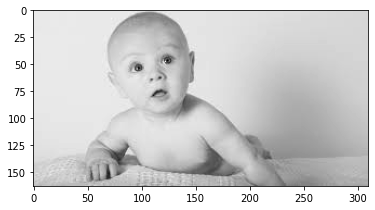

In [ ]:
# display by plt
plt.imshow(gray_img, cmap='gray')

#display by opencv
# cv2.imshow('abc', gray_img)
# cv2.waitKey(0)
# cv2.detroyAllWindows()

In [ ]:
haar_face_cascade =cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [ ]:
# scaleFactor: tham số chỉ định kích thước hình ảnh đc giảm bao nhiu ở mỗi tỉ lệ hình ảnh. Ví dụ 1.03 là giảm kích thước xuống 3%.
# minNeighbors: chỉ định số lượng hàng xóm mà HCN ứng viên phải có. Giá trị càng cao thì dẫn đến ít phát hiện hơn nhưng chất lượng cao hơn. Default = 5
# minNeighbors=5: xét 5 hàng xóm gần nhất vs nó
faces = haar_face_cascade.detectMultiScale(gray_img,
                                           scaleFactor=1.1,
                                           minNeighbors=5)

- scaleFactor: Tham số chỉ định kích thước hình ảnh được giảm bao nhiêu ở mỗi tỷ lệ hình ảnh. Giả sử, hệ số tỷ lệ là 1.03, nghĩa là đang sử dụng một bước nhỏ để thay đổi kích thước, tức là giảm kích thước xuống 3%, tăng cơ hội tìm thấy kích thước phù hợp với mô hình để phát hiện
- minNeighbors : Tham số chỉ định số lượng hàng xóm mà mỗi hình chữ nhật ứng viên phải có. Tham số này sẽ ảnh hưởng đến chất lượng của các khuôn mặt được phát hiện: giá trị cao hơn dẫn đến ít phát hiện hơn nhưng chất lượng cao hơn. Default: 5


In [ ]:
print('Face found', len(faces))

Face found 1


In [ ]:
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

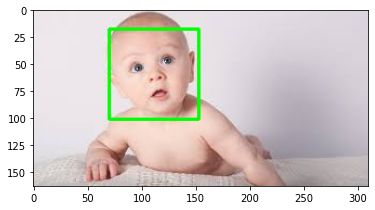

In [ ]:
plt.imshow(convertToRGB(test1))

In [ ]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed 
    img_copy = colored_img.copy()

    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY) 

    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, 
    minNeighbors=5)   
    faces_found = len(faces)

    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)

    return img_copy, faces_found


Face found 2


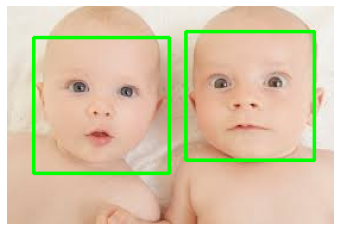

In [ ]:
test2 = cv2.imread('FaceDetection/baby2.jpg')
faces_detected_img_2, faces_found_2 = detect_faces(haar_face_cascade, test2)

plt.imshow(convertToRGB(faces_detected_img_2))
plt.axis('off')

print('Face found', faces_found_2)

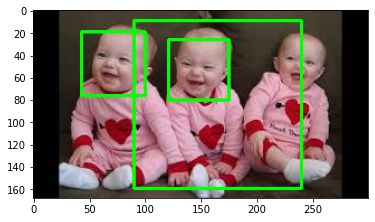

In [ ]:
#load another image
test3 = cv2.imread('FaceDetection/triple.jpg')
# #call our function to detect faces
faces_detected_img_3, faces_found_3 = detect_faces(haar_face_cascade, test3)
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img_3))


In [ ]:
'''
scaleFactor = 1.1 => có thể bị nhận diện nhầm do 1 bé bị lệch
=> chỉnh theo kiểu handle cho đến khi ổn là dc, scaleFactor lúc nào cũng phải >1 nhaaa
'''

'\nscaleFactor = 1.1 => có thể bị nhận diện nhầm do 1 bé bị lệch\n=> chỉnh theo kiểu handle cho đến khi ổn là dc\n'

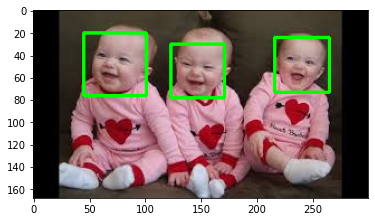

In [ ]:
#load another image
test3 = cv2.imread('FaceDetection/triple.jpg')
# #call our function to detect faces
faces_detected_img_3, faces_found_3 = detect_faces(haar_face_cascade, test3, 1.15)
#convert image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img_3))


### **LBP**

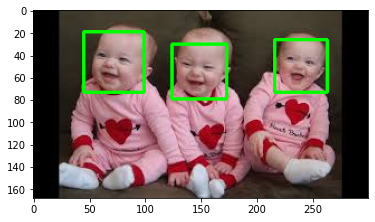

In [ ]:
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

test4 = cv2.imread('FaceDetection/triple.jpg')
faces_detected_img_3, faces_found_3 = detect_faces(lbp_face_cascade, test4, 1.05)
plt.imshow(convertToRGB(faces_detected_img_3))